<a href="https://colab.research.google.com/github/student-saptarshighosh/saptarshighosh-project/blob/main/bengaliword2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import re
from re import sub
import string
import collections


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/main_dataset_v3.csv')

In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

In [ ]:
df.head()

,Sentence
0,তাদের উত্তরের মধ্যে সামরিকতার ঝাঁজ ছিল
1,ফোন করে যা শুনেছি তা তো মানুষ জানে আমরা তো এগু...
2,আন্তর্জাতিক মাতৃভাষা দিবস উপলক্ষে নিউ ইয়র্কে জ...
3,হামলায় অভিযুক্ত ছাত্রদল নেতা রহিমের মোবাইল নম্...
4,এই সফরে বাংলাদেশ ছাড়াও ভারত ও নেপাল যাবেন শারমেন


In [ ]:
def pattern(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"
                           u"\u2000-\u206F"

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    return text
def removepunc(text):
    new_corpus=[]
    punct =list(set(string.punctuation))
    punct.extend(["’", "‘", "—"])
    no_punct=''
    for char in text:
        if char not in punct:
            no_punct = no_punct + char
    return no_punct
def remove_stopword(text):
    text=text.split()
    text=[word for word in text if not word in stop]
    text=' '.join(text)
    return text
def preprocess(text):
    out=removepunc(pattern(text))
    return out

In [ ]:
df['Sentence'] = df.Sentence.apply(lambda x: preprocess(str(x)))

In [ ]:
df['Sentence']

0                     তাদের উত্তরের মধ্যে সামরিকতার ঝাঁজ ছিল
1          ফোন করে যা শুনেছি তা তো মানুষ জানে আমরা তো এগু...
2          আন্তর্জাতিক মাতৃভাষা দিবস উপলক্ষে নিউ ইয়র্কে জ...
3          হামলায় অভিযুক্ত ছাত্রদল নেতা রহিমের মোবাইল নম্...
4           এই সফরে বাংলাদেশ ছাড়াও ভারত ও নেপাল যাবেন শারমেন
                                 ...                        
1982304                            কিন্তু এখন প্রকৃতি অস্থির
1982305    দেশটির প্রধানমন্ত্রী টনি অ্যাবোট জঙ্গিদের এমন ...
1982306    দণ্ডপ্রাপ্ত ব্যক্তিরা হলেন মো শাহিন রেজাউর রহম...
1982307    বাফুফে সভাপতি কাজী সালাউদ্দিন জানিয়েছেন আজ মঙ্...
1982308    অবশ্য গ্যাসটির মাত্রা বৃদ্ধির সঙ্গে সঙ্গে বিশ্...
Name: Sentence, Length: 1982309, dtype: object

In [ ]:
df['Sentence'] = df.Sentence.apply(lambda x: remove_stopword(str(x)))

In [ ]:
df['Sentence']

0                                     উত্তরের সামরিকতার ঝাঁজ
1                          ফোন শুনেছি এগুলো শুনতে অভ্যস্ত না
2          আন্তর্জাতিক মাতৃভাষা দিবস উপলক্ষে নিউ ইয়র্কে জ...
3          হামলায় অভিযুক্ত ছাত্রদল নেতা রহিমের মোবাইল নম্...
4                      সফরে বাংলাদেশ ভারত নেপাল যাবেন শারমেন
                                 ...                        
1982304                                       প্রকৃতি অস্থির
1982305    দেশটির প্রধানমন্ত্রী টনি অ্যাবোট জঙ্গিদের নৃশং...
1982306    দণ্ডপ্রাপ্ত ব্যক্তিরা হলেন মো শাহিন রেজাউর রহম...
1982307    বাফুফে সভাপতি কাজী সালাউদ্দিন জানিয়েছেন মঙ্গলব...
1982308    গ্যাসটির মাত্রা বৃদ্ধির বিশ্বের তাপমাত্রা হারে...
Name: Sentence, Length: 1982309, dtype: object

In [ ]:
corpus=[row for row in df.Sentence]

In [ ]:
corpus

['উত্তরের সামরিকতার ঝাঁজ',
 'ফোন শুনেছি এগুলো শুনতে অভ্যস্ত না',
 'আন্তর্জাতিক মাতৃভাষা দিবস উপলক্ষে নিউ ইয়র্কে জাতিসংঘ সদর দপ্তরে অনুষ্ঠান',
 'হামলায় অভিযুক্ত ছাত্রদল নেতা রহিমের মোবাইল নম্বরে ফোন করেও পাওয়া যায়নি',
 'সফরে বাংলাদেশ ভারত নেপাল যাবেন শারমেন',
 'চাইলে নৌপরিবহন মন্ত্রণালয়সম্পর্কিত সংসদীয় কমিটির সভাপতি মেজর অব রফিকুল ইসলাম আলোকে অনানুষ্ঠানিক বৈঠক',
 'একপর্যায়ে রংপুরের জনতা কারফিউ ভঙ্গ রাস্তায় নামে',
 'নির্বাচনী এলাকাগুলোতে জরুরি শিথিল',
 'বাথরুমের আয়নায় দাঁড়িয়ে দেখেছিলাম চেহারা ভূগোল পাল্টে',
 'প্রধানমন্ত্রীর উপদেষ্টা ভারতে বিদ্যুৎ উৎপাদন সেখানকার লোকজনই মূল গ্রাহক',
 'নিষেধাজ্ঞার কবলে পড়া সাকিব আল হাসানকে আফগানিস্তান ম্যাচ মাঠের থাকতে',
 'প্রধানমন্ত্রী মুক্তিযুদ্ধে অবদান বিদেশি বন্ধুদের সম্মাননা দেওয়াকে প্রশ্নবিদ্ধ করতেই হঠাৎ লোক এটাকে ইস্যু',
 'ছাত্রলীগের সভাপতি ছাত্রত্ব হওয়ার আওয়ামী লীগের যুক্ত',
 'টুইটারে হ্যাশট্যাগ',
 'কুয়াশা কেটে ফেরিগুলো গন্তব্যে রওনা',
 'স্থানীয়দের বরাত বরিশালগামী লোকাল বাস বিপরীতমুখী মাইক্রোবাসকে ধাক্কা দিলে হতাহতের ঘটনা ঘটে',
 'সড়ক জনপথ অ

In [ ]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

In [ ]:
voc_size = int(len(set(words)) // 1.2)

def build_dataset(words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(voc_size-1))
    dictionary = dict()

    for word, _ in count:
        dictionary[word] = len(dictionary)

    data = list()
    unk_count = 0

    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0
            unk_count += 1
        data.append(index)

    count[0][1] = unk_count

    rev_dict= dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, rev_dict

data, count, dictionary, rev_dict = build_dataset(words)
print("Vocabulary size", voc_size)
print("Most common words (+UNK)", count[:5])
print("Sample data", data[:10])
del words


Vocabulary size 410302
Most common words (+UNK) [['UNK', 82062], ('না', 184459), ('বিডিনিউজ', 80578), ('টোয়েন্টিফোর', 74940), ('জানান', 69930)]
Sample data [4997, 256739, 46457, 816, 3639, 1415, 1868, 6951, 1, 122]


In [ ]:
data_index = 0

def generate_batch(batch_size, bag_window):
    global data_index
    span = 2 * bag_window + 1
    batch = np.ndarray(shape=(batch_size, span-1), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    buffer = collections.deque(maxlen=span)

    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)

    for i in range(batch_size):
        buffer_list = list(buffer)
        labels[i, 0] = buffer_list.pop(bag_window)
        batch[i] = buffer_list

        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

print('Data:', [rev_dict[di] for di in data[:16]])

for bag_window in [1, 3]:
    data_index = 0
    batch, labels = generate_batch(batch_size=4, bag_window=bag_window)
    print("\nwith bag_window = %d:" % (bag_window))
    print(" batch:", [[rev_dict[w] for w in bi] for bi in batch])
    print(" label:", [rev_dict[li] for li in labels.reshape(4)])

Data: ['উত্তরের', 'সামরিকতার', 'ঝাঁজ', 'ফোন', 'শুনেছি', 'এগুলো', 'শুনতে', 'অভ্যস্ত', 'না', 'আন্তর্জাতিক', 'মাতৃভাষা', 'দিবস', 'উপলক্ষে', 'নিউ', 'ইয়র্কে', 'জাতিসংঘ']

with bag_window = 1:
 batch: [['উত্তরের', 'ঝাঁজ'], ['সামরিকতার', 'ফোন'], ['ঝাঁজ', 'শুনেছি'], ['ফোন', 'এগুলো']]
 label: ['সামরিকতার', 'ঝাঁজ', 'ফোন', 'শুনেছি']

with bag_window = 3:
 batch: [['উত্তরের', 'সামরিকতার', 'ঝাঁজ', 'শুনেছি', 'এগুলো', 'শুনতে'], ['সামরিকতার', 'ঝাঁজ', 'ফোন', 'এগুলো', 'শুনতে', 'অভ্যস্ত'], ['ঝাঁজ', 'ফোন', 'শুনেছি', 'শুনতে', 'অভ্যস্ত', 'না'], ['ফোন', 'শুনেছি', 'এগুলো', 'অভ্যস্ত', 'না', 'আন্তর্জাতিক']]
 label: ['ফোন', 'শুনেছি', 'এগুলো', 'শুনতে']


In [ ]:
import random
import math
import tensorflow as tf

In [ ]:
batch_size = 128
embedding_size = 128
bag_window = 2
valid_size = 16
valid_window = 100
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):
    train_dataset = tf.compat.v1.placeholder(tf.int32, shape=[batch_size, bag_window * 2])
    train_labels = tf.compat.v1.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    embeddings = tf.Variable(tf.random.uniform([voc_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(tf.random.truncated_normal([voc_size, embedding_size], stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([voc_size]))

    embeds = tf.nn.embedding_lookup(embeddings, train_dataset)
    loss = tf.reduce_mean(tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases,
                                                     inputs=tf.reduce_sum(embeds, 1), labels=train_labels,
                                                     num_sampled=num_sampled, num_classes=voc_size))

    optimizer = tf.compat.v1.train.AdagradOptimizer(0.05).minimize(loss)

    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import matplotlib.pyplot as plt

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Initialized
Average loss at step 0: 7.600610
Nearest to কথা: ভিন্নমাত্রায় চালাচালিই হাঁটিয়ে ঊদীপ্ত স্পেশালিস্টদের আইপিএলর রাফজান ফুরোয়
Nearest to মো: জিম্মিকেও মেলাননি অপ্রকাশিতঅগ্রন্থিতবিলুপ্ত ইপিআরএর বলেছেনআইপিইউ অসিন্দি সফিউল্লাহকেও রাইকার্ডরোনালদিনহো
Nearest to বাংলাদেশের: অ্যালগরিদম শৃঙ্খলাভঙ্গসহ বেসুরে দাদিশাশুড়ি শাহাবুদ্দিনের খেলাপাগল কুড়িলগামী বটসহ
Nearest to সরকারি: ক্র্যাফটের ক্লোজড্ তোষামোদকারী বামপ্রান্ত এনামুলেরই শাবাশ সিইসিএর পর্যটকদেরকে
Nearest to তথ্য: সেটফার্নিচার কান্ডজ্ঞানহীন ব্যাহত তুলসীগাছের আইন়শৃ੦খলা৴ আইএসিপর৹র জাপৃ আনজেম
Nearest to সকাল: তুস সৃষ্টিকুলের স্পিকারও কৃপাদৃষ্টি আমো যানশেখ বৈরামপুর হাজারখানেকের
Nearest to সরকারের: এক্সপ্রেসটি আইনে ডটকমপ্রতিনিধিকিউএইচএমআই যোগাযোগগুলো উন্মত্ততায় ব্যয়বিষয়ক বেড়াচেছন ভোজনরসিকরা
Nearest to টাকা: সবদুল উৎসটি এশিয়ন গৃহবধূদের অভিভাবকের এম্বেসিতেযেখানেই অপদস্ত কনজু৵মার
Nearest to জেলা: মুচ্চিনোর ফিজিথেরাপি অশ্রূসজল ফকিরউদ্দিন উদারপন্থীমধ্যপন্থীরাই শেল এডসন শাঁস
Nearest to বিএনপির: দৃষ্কৃতকারীরা ভাবমূিতગ সুজনপালশার রংপুরই হ্

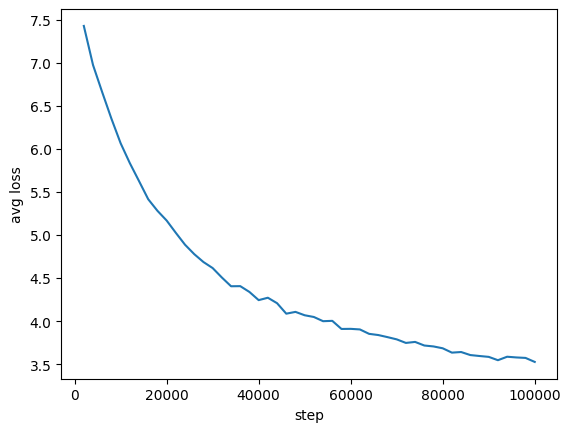

In [ ]:
num_steps = 100001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    average_loss = 0
    x=[]
    y=[]
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(batch_size, bag_window)
        feed_dict = {train_dataset: batch_data, train_labels: batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l

        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
                x.append(average_loss)
                y.append(step)

            print("Average loss at step %d: %f" % (step, average_loss))
            average_loss = 0

        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = rev_dict[valid_examples[i]]
                top_k = 8
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log = "Nearest to %s:" % valid_word

                for k in range(top_k):
                    close_word = rev_dict[nearest[k]]
                    log = "%s %s" % (log, close_word)
                print(log)

    final_embeddings = normalized_embeddings.eval()
    arr_x=np.array(y)
    arr_y=np.array(x)
    plt.ylabel('avg loss')
    plt.xlabel('step')
    plt.plot(arr_x,arr_y)
    plt.show()